In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt

%matplotlib inline
import plotly.express as px

import torch
import torchaudio


import librosa
import librosa.display
import IPython.display as ipd
import warnings
import seaborn as sns

In [2]:
data = pd.read_csv("../input/birdclef-2021/train_metadata.csv")
data.describe()
data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129981


In [3]:
base_dir = "../input/birdclef-2021/train_short_audio"
data["full_path"] = base_dir + "/" + data["primary_label"] + "/" + data["filename"]

In [4]:
dups_primary_label = data.pivot_table(columns=["primary_label"], aggfunc="size")
dups_primary_label.sort_values(ascending=False)

primary_label
redcro     500
comrav     500
houspa     500
norcar     500
barswa     500
          ... 
whcpar      12
wegspa1     10
runwre1      9
crfpar       8
stvhum2      8
Length: 397, dtype: int64

*There are totally 397 birds in the train_metadata dataset, and the top five frequency bird is redcro, comrav, houspa, norcar, and barswa.*

In [5]:
redcro = data[data["primary_label"] == "redcro"].head(1)["full_path"].values[0]
comrav = data[data["primary_label"] == "comrav"].head(1)["full_path"].values[0]
houspa = data[data["primary_label"] == "houspa"].head(1)["full_path"].values[0]
norcar = data[data["primary_label"] == "norcar"].head(1)["full_path"].values[0]
barswa = data[data["primary_label"] == "barswa"].head(1)["full_path"].values[0]

label_list = [redcro, comrav, houspa, norcar, barswa]

In [6]:
ipd.Audio(redcro)

In [7]:
# Waveform
def waveform(label):
    y, sr = librosa.load(label)
    fig, ax = plt.subplots(1, figsize=(12, 5))
    librosa.display.waveshow(y, sr)
    ax.set(title="waveform")


def mel_spectrogram(label):
    # Mel-spectrogram
    # spectrogram: intensity of frequency over time.
    y, sr = librosa.load(label)
    S = librosa.feature.melspectrogram(y, sr)
    fig, ax = plt.subplots(1, figsize=(12, 5))
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(
        S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000, ax=ax
    )
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    ax.set(title="Mel-frequency spectrogram")


def mfcc(label):
    y, sr = librosa.load(label)
    S = librosa.feature.mfcc(y, sr)
    fig, ax = plt.subplots(1, figsize=(12, 5))
    img = librosa.display.specshow(S, x_axis="time", ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title="MFCC")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Pass y=[-3.0921852e-05 -2.4451017e-05 -2.9929166e-05 ... -4.3454273e-03
 -6.3311839e-03  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Pass y=[-3.0921852e-05 -2.4451017e-05 -2.9929166e-05 ... -4.3454273e-03
 -6.3311839e-03  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


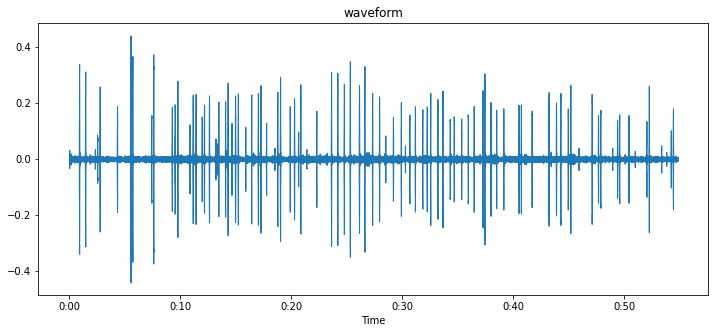

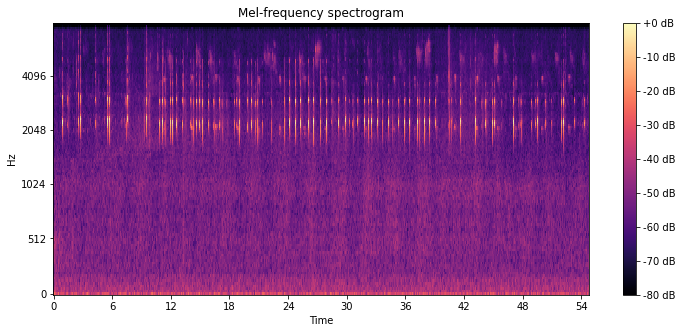

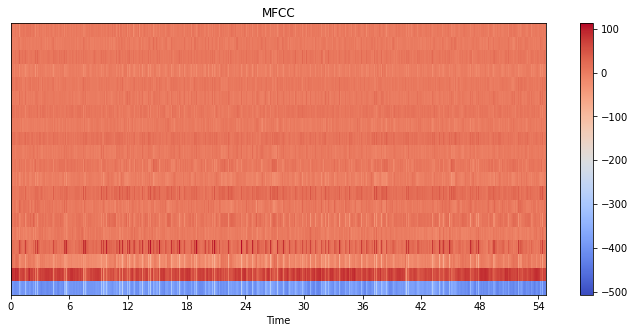

In [8]:
# for elem in label_list:
#     waveform(elem)
#     mel_spectrogram(elem)
#     mfcc(elem)
waveform(redcro)
mel_spectrogram(redcro)
mfcc(redcro)

[Text(0.5, 1.0, 'Top 30 Birds Record')]

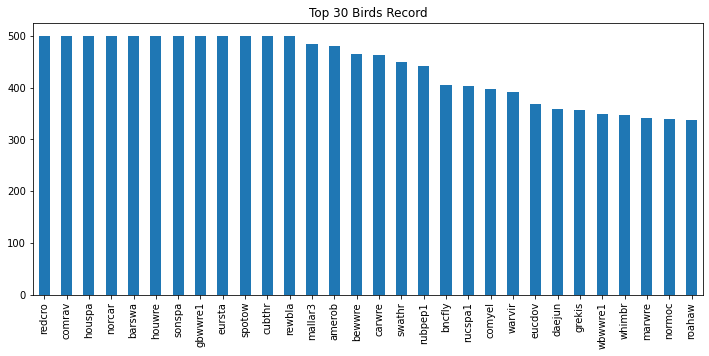

In [9]:
# Metadata
fig, ax = plt.subplots(1, figsize=(12, 5))
ax = data["primary_label"].value_counts()[0:30].plot.bar()
ax.set(title="Top 30 Birds Record")

In [10]:
# Here we use a column with categorical data
fig = px.histogram(
    data, x="primary_label", title="all birds count", width=800, height=400
)
fig.show()

dfg = (
    data.groupby(["primary_label"])
    .size()
    .to_frame()
    .sort_values([0], ascending=False)
    .head(30)
    .reset_index()
)
dfg.columns = ["primary_label", "count"]
fig = px.histogram(
    dfg,
    x="primary_label",
    y="count",
    opacity=0.8,
    title="Top 30 Birds Record",
    width=800,
    height=400,
)
fig.show()

In [11]:
fig = px.scatter_geo(
    data,
    lat=data["latitude"],
    lon=data["longitude"],
    color=data["common_name"],
    width=800,
    height=400,
)
fig.show()

In [12]:
dfg = (
    data.groupby(["rating"])
    .size()
    .to_frame()
    .sort_values([0], ascending=False)
    .head(11)
    .reset_index()
)
dfg.columns = ["rating", "count"]
fig = px.histogram(
    dfg,
    x="rating",
    y="count",
    opacity=0.6,
    title="Rating Count",
    width=800,
    height=400,
    nbins=11,
)
fig.show()